In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300) 
pd.options.display.float_format = '{:40,.7f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('MSOA_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983 entries, 0 to 982
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSOA11CD        983 non-null    object 
 1   MSOA            983 non-null    object 
 2   housing_price   983 non-null    int64  
 3   mean_income     983 non-null    int64  
 4   population      983 non-null    int64  
 5   fertility_rate  983 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 46.2+ KB


In [4]:
df.head()

,MSOA11CD,MSOA,housing_price,mean_income,population,fertility_rate
0,E02000001,City of London 001,894046,79700,8072,37.9000000
1,E02000002,Barking and Dagenham 001,218348,38600,7235,95.6000000
2,E02000003,Barking and Dagenham 002,233599,46400,10732,81.3000000
3,E02000004,Barking and Dagenham 003,239080,45300,6419,55.3000000
4,E02000005,Barking and Dagenham 004,222851,41000,9056,70.6000000


In [5]:
df.describe()

,housing_price,mean_income,population,fertility_rate
count,983.0000000,983.0000000,983.0000000,983.0000000
mean,"499,355.3652085","51,379.9593082","8,686.3570702",73.6036623
std,"386,152.6394546","10,766.5401197","1,634.4817105",19.8616879
min,"160,391.0000000","32,000.0000000","5,359.0000000",15.5000000
25%,"288,350.0000000","43,700.0000000","7,600.0000000",59.7000000
50%,"385,748.0000000","49,400.0000000","8,466.0000000",71.9000000
75%,"562,257.5000000","57,200.0000000","9,531.0000000",85.7500000
max,"5,257,978.0000000","105,700.0000000","15,867.0000000",174.8000000


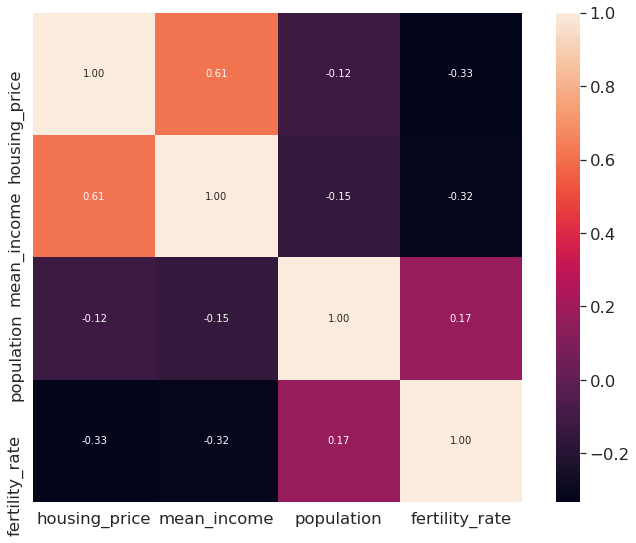

In [6]:
corr = df.corr()
k=15
cols = corr.nlargest(k, 'housing_price')['housing_price'].index
heat = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
hm = sns.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
df.corrwith(df.housing_price)

housing_price                                   1.0000000
mean_income                                     0.6119313
population                                     -0.1221189
fertility_rate                                 -0.3317584
dtype: float64

In [8]:
# forward selection
df_1 = df.loc[:,['housing_price', 'mean_income']]

model_1 = sm.formula.ols('housing_price ~ mean_income', df_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     587.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          4.81e-102
Time:                        12:16:25   Log-Likelihood:                -13809.
No. Observations:                 983   AIC:                         2.762e+04
Df Residuals:                     981   BIC:                         2.763e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.283e+05   4.75e+04    -13.215      0.000   -7.22e+05   -5.35e+05
mean_income    21.9475      0.906     24.233      0.000      20.170      23.725
==============================================================================
Omnibus:                      916.327   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49937.081
Skew:                           4.114   Prob(JB):                         0.00
Kurtosis:                      36.934   Cond. No.                     2.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df_2 = df.loc[:,['housing_price', 'population']]

model_2 = sm.formula.ols('housing_price ~ population', df_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     14.85
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           0.000124
Time:                        12:16:26   Log-Likelihood:                -14032.
No. Observations:                 983   AIC:                         2.807e+04
Df Residuals:                     981   BIC:                         2.808e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     7.5e+05   6.62e+04     11.334      0.000     6.2e+05     8.8e+05
population   -28.8511      7.487     -3.854      0.000     -43.543     -14.160
==============================================================================
Omnibus:                      944.353   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48361.684
Skew:                           4.360   Prob(JB):                         0.00
Kurtosis:                      36.237   Cond. No.                     4.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df_3 = df.loc[:,['housing_price', 'fertility_rate']]

model_3 = sm.formula.ols('housing_price ~ fertility_rate', df_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     121.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.10e-26
Time:                        12:16:26   Log-Likelihood:                -13982.
No. Observations:                 983   AIC:                         2.797e+04
Df Residuals:                     981   BIC:                         2.798e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.741e+05   4.46e+04     21.821      0.000    8.87e+05    1.06e+06
fertility_rate -6450.0753    585.582    -11.015      0.000   -7599.213   -5300.938
==============================================================================
Omnibus:                      915.164   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43188.857
Skew:                           4.169   Prob(JB):                         0.00
Kurtosis:                      34.384   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
df_4 = df.loc[:,['housing_price', 'mean_income','population']]

model_4 = sm.formula.ols('housing_price ~ mean_income + population', df_4).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     294.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          6.15e-101
Time:                        12:16:27   Log-Likelihood:                -13808.
No. Observations:                 983   AIC:                         2.762e+04
Df Residuals:                     980   BIC:                         2.764e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.503e+05   7.59e+04     -7.248      0.000   -6.99e+05   -4.01e+05
mean_income    21.7718      0.915     23.791      0.000      19.976      23.568
population     -7.9402      6.028     -1.317      0.188     -19.770       3.889
==============================================================================
Omnibus:                      920.610   Durbin-Watson:                   0.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51395.330
Skew:                           4.137   Prob(JB):                         0.00
Kurtosis:                      37.444   Cond. No.                     4.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
df_5 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_5 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     319.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.13e-107
Time:                        12:16:27   Log-Likelihood:                -13793.
No. Observations:                 983   AIC:                         2.759e+04
Df Residuals:                     980   BIC:                         2.761e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.224e+05   7.07e+04     -4.561      0.000   -4.61e+05   -1.84e+05
mean_income       20.2095      0.941     21.485      0.000      18.364      22.055
fertility_rate -2942.4802    509.903     -5.771      0.000   -3943.108   -1941.853
==============================================================================
Omnibus:                      905.258   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49492.097
Skew:                           4.029   Prob(JB):                         0.00
Kurtosis:                      36.815   Cond. No.                     3.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
df_6 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_6 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.93e-106
Time:                        12:16:28   Log-Likelihood:                -13792.
No. Observations:                 983   AIC:                         2.759e+04
Df Residuals:                     979   BIC:                         2.761e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.923e+05   8.76e+04     -3.335      0.001   -4.64e+05    -1.2e+05
mean_income       20.1557      0.945     21.317      0.000      18.300      22.011
fertility_rate -2902.9733    514.564     -5.642      0.000   -3912.749   -1893.198
population        -3.4879      5.988     -0.583      0.560     -15.238       8.262
==============================================================================
Omnibus:                      907.273   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50143.873
Skew:                           4.039   Prob(JB):                         0.00
Kurtosis:                      37.044   Cond. No.                     4.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
df_final1 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_final1 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_final1).fit()
model_final1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     319.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.13e-107
Time:                        12:16:29   Log-Likelihood:                -13793.
No. Observations:                 983   AIC:                         2.759e+04
Df Residuals:                     980   BIC:                         2.761e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.224e+05   7.07e+04     -4.561      0.000   -4.61e+05   -1.84e+05
mean_income       20.2095      0.941     21.485      0.000      18.364      22.055
fertility_rate -2942.4802    509.903     -5.771      0.000   -3943.108   -1941.853
==============================================================================
Omnibus:                      905.258   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49492.097
Skew:                           4.029   Prob(JB):                         0.00
Kurtosis:                      36.815   Cond. No.                     3.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# backward selection
df_7 = df.loc[:,['housing_price', 'mean_income','fertility_rate','population']]

model_7 = sm.formula.ols('housing_price ~ mean_income + fertility_rate + population', df_7).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.93e-106
Time:                        12:16:29   Log-Likelihood:                -13792.
No. Observations:                 983   AIC:                         2.759e+04
Df Residuals:                     979   BIC:                         2.761e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.923e+05   8.76e+04     -3.335      0.001   -4.64e+05    -1.2e+05
mean_income       20.1557      0.945     21.317      0.000      18.300      22.011
fertility_rate -2902.9733    514.564     -5.642      0.000   -3912.749   -1893.198
population        -3.4879      5.988     -0.583      0.560     -15.238       8.262
==============================================================================
Omnibus:                      907.273   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            50143.873
Skew:                           4.039   Prob(JB):                         0.00
Kurtosis:                      37.044   Cond. No.                     4.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
df_8 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_8 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_8).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     319.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.13e-107
Time:                        12:16:30   Log-Likelihood:                -13793.
No. Observations:                 983   AIC:                         2.759e+04
Df Residuals:                     980   BIC:                         2.761e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.224e+05   7.07e+04     -4.561      0.000   -4.61e+05   -1.84e+05
mean_income       20.2095      0.941     21.485      0.000      18.364      22.055
fertility_rate -2942.4802    509.903     -5.771      0.000   -3943.108   -1941.853
==============================================================================
Omnibus:                      905.258   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49492.097
Skew:                           4.029   Prob(JB):                         0.00
Kurtosis:                      36.815   Cond. No.                     3.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df_final2 = df.loc[:,['housing_price', 'mean_income','fertility_rate']]

model_final2 = sm.formula.ols('housing_price ~ mean_income + fertility_rate', df_final2).fit()
model_final2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          housing_price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     319.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          1.13e-107
Time:                        12:16:30   Log-Likelihood:                -13793.
No. Observations:                 983   AIC:                         2.759e+04
Df Residuals:                     980   BIC:                         2.761e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.224e+05   7.07e+04     -4.561      0.000   -4.61e+05   -1.84e+05
mean_income       20.2095      0.941     21.485      0.000      18.364      22.055
fertility_rate -2942.4802    509.903     -5.771      0.000   -3943.108   -1941.853
==============================================================================
Omnibus:                      905.258   Durbin-Watson:                   0.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49492.097
Skew:                           4.029   Prob(JB):                         0.00
Kurtosis:                      36.815   Cond. No.                     3.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [19]:
df_final2 = drop_column_using_vif_(df_final2.drop('housing_price', axis=1))

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


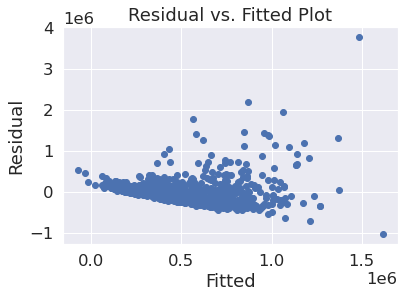

In [20]:
# plot 
plt.scatter(model_final2.fittedvalues, model_final2.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

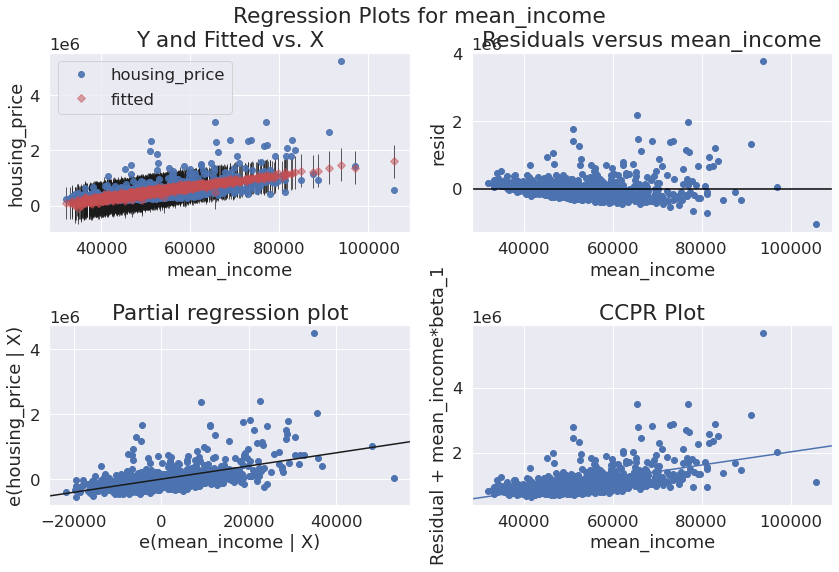

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'mean_income', fig=fig)

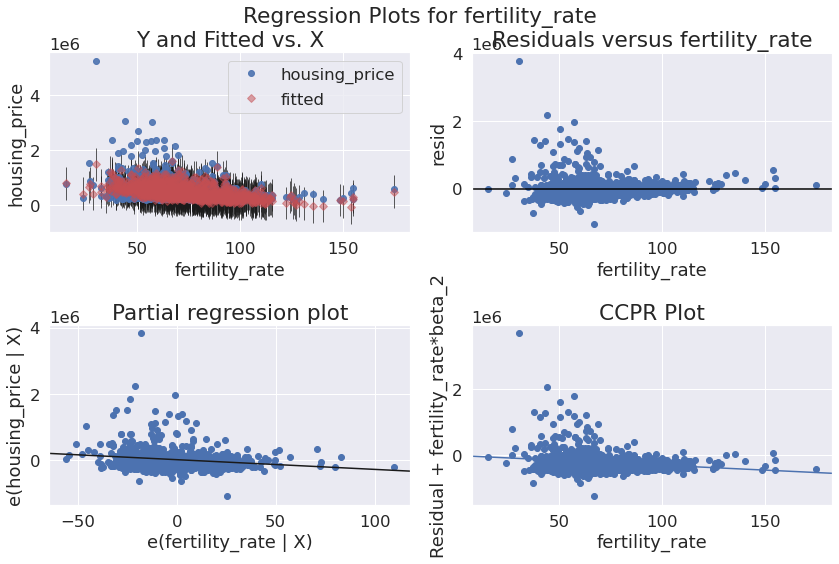

In [22]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_final2, 'fertility_rate', fig=fig)

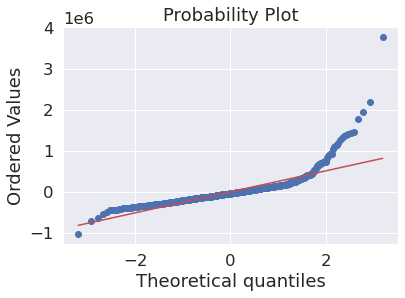

In [23]:
resid = model_final2.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()

In [24]:
import os
import geopandas as gpd
import matplotlib.cm as cm
from requests import get
from urllib.parse import urlparse

/home/shiraozhang/miniconda3/envs/sds2021/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1dev-CAPI-1.14.1) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [25]:
url = 'https://github.com/jreades/fsds/raw/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip'

! wget $url

--2023-01-30 12:17:52--  https://github.com/jreades/fsds/raw/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jreades/fsds/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip [following]
--2023-01-30 12:17:54--  https://raw.githubusercontent.com/jreades/fsds/master/data/src/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7381177 (7.0M) [application/zip]
Saving to: ‘Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2

In [26]:
gdf = gpd.read_file(f"zip://Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip!Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2.shp")
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    7201 non-null   int64   
 1   MSOA11CD    7201 non-null   object  
 2   MSOA11NM    7201 non-null   object  
 3   MSOA11NMW   7201 non-null   object  
 4   BNG_E       7201 non-null   int64   
 5   BNG_N       7201 non-null   int64   
 6   LONG        7201 non-null   float64 
 7   LAT         7201 non-null   float64 
 8   Shape__Are  7201 non-null   float64 
 9   Shape__Len  7201 non-null   float64 
 10  geometry    7201 non-null   geometry
dtypes: float64(4), geometry(1), int64(3), object(3)
memory usage: 619.0+ KB


<AxesSubplot:>

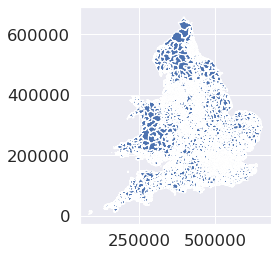

In [27]:
gdf.plot()

In [28]:
df2 = df = pd.read_csv('MSOA_data.csv',low_memory=False)

In [29]:
merged = gdf.set_index('MSOA11CD').join(df2.set_index('MSOA11CD'))
merged.head()

,OBJECTID,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,MSOA,housing_price,mean_income,population,fertility_rate
MSOA11CD,,,,,,,,,,,,,,,
E02000001,1,City of London 001,City of London 001,532384,181355,-0.0934900,51.5156100,"2,906,360.9617767","8,936.8184782","POLYGON ((532135.138 182198.131, 532158.250 18...",City of London 001,"894,046.0000000","79,700.0000000","8,072.0000000",37.9000000
E02000002,2,Barking and Dagenham 001,Barking and Dagenham 001,548267,189685,0.1387560,51.5865200,"2,166,163.2085114","8,150.4059278","POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham 001,"218,348.0000000","38,600.0000000","7,235.0000000",95.6000000
E02000003,3,Barking and Dagenham 002,Barking and Dagenham 002,548259,188520,0.1381490,51.5760500,"2,143,567.8085785","9,118.1962429","POLYGON ((549102.438 189324.625, 548954.517 18...",Barking and Dagenham 002,"233,599.0000000","46,400.0000000","10,732.0000000",81.3000000
E02000004,4,Barking and Dagenham 003,Barking and Dagenham 003,551004,186412,0.1768280,51.5563800,"2,491,466.7357025","8,206.5516273","POLYGON ((551550.056 187364.705, 551478.000 18...",Barking and Dagenham 003,"239,080.0000000","45,300.0000000","6,419.0000000",55.3000000
E02000005,5,Barking and Dagenham 004,Barking and Dagenham 004,548733,186824,0.1442670,51.5606900,"1,186,053.1257782","6,949.6887981","POLYGON ((549099.634 187656.076, 549161.375 18...",Barking and Dagenham 004,"222,851.0000000","41,000.0000000","9,056.0000000",70.6000000


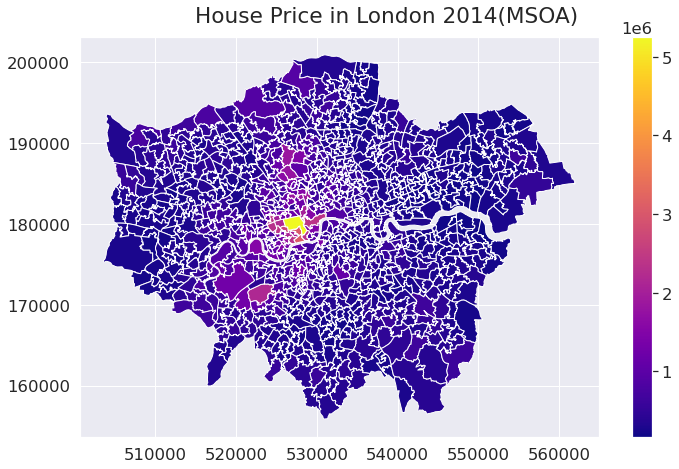

In [30]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
merged.plot(column='housing_price', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle('House Price in London 2014(MSOA)');

In [31]:
df3 = pd.read_csv('MSOA_data_residual.csv',low_memory=False)

In [32]:
merged2 = gdf.set_index('MSOA11CD').join(df3.set_index('MSOA11CD'))
merged2.head()

,OBJECTID,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,MSOA,residual
MSOA11CD,,,,,,,,,,,,
E02000001,1,City of London 001,City of London 001,532384,181355,-0.0934900,51.5156100,"2,906,360.9617767","8,936.8184782","POLYGON ((532135.138 182198.131, 532158.250 18...",City of London 001,"-282,600.9902000"
E02000002,2,Barking and Dagenham 001,Barking and Dagenham 001,548267,189685,0.1387560,51.5865200,"2,166,163.2085114","8,150.4059278","POLYGON ((548881.563 190845.265, 548881.125 19...",Barking and Dagenham 001,"42,058.1620700"
E02000003,3,Barking and Dagenham 002,Barking and Dagenham 002,548259,188520,0.1381490,51.5760500,"2,143,567.8085785","9,118.1962429","POLYGON ((549102.438 189324.625, 548954.517 18...",Barking and Dagenham 002,"-142,610.1469000"
E02000004,4,Barking and Dagenham 003,Barking and Dagenham 003,551004,186412,0.1768280,51.5563800,"2,491,466.7357025","8,206.5516273","POLYGON ((551550.056 187364.705, 551478.000 18...",Barking and Dagenham 003,"-191,185.1882000"
E02000005,5,Barking and Dagenham 004,Barking and Dagenham 004,548733,186824,0.1442670,51.5606900,"1,186,053.1257782","6,949.6887981","POLYGON ((549099.634 187656.076, 549161.375 18...",Barking and Dagenham 004,"-75,517.7216600"


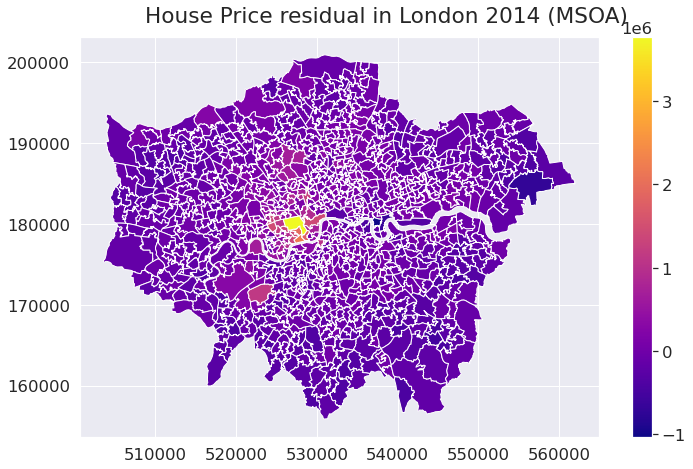

In [33]:
f = plt.figure()
f.set_size_inches(12,7)

ax1 = f.add_subplot()
merged2.plot(column='residual', legend=True, cmap='plasma', figsize=(12,6), ax=ax1)

f.subplots_adjust(top=0.92)
f.suptitle('House Price residual in London 2014 (MSOA)');

In [34]:
import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt
import sklearn.metrics as sklm

import libpysal
import warnings

In [36]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler(quantile_range=(10.0, 90.0))

In [37]:
df = pd.read_csv('MSOA_data.csv')
ppd = pd.merge(gdf, df, left_on='MSOA11CD', right_on='MSOA11CD', how='inner').reset_index()
ppd.shape

(983, 17)

In [38]:
raw = ppd[['MSOA11CD','mean_income','population','fertility_rate','housing_price']].set_index('MSOA11CD').copy()
raw.head()

,mean_income,population,fertility_rate,housing_price
MSOA11CD,,,,
E02000001,79700,8072,37.9000000,894046
E02000002,38600,7235,95.6000000,218348
E02000003,46400,10732,81.3000000,233599
E02000004,45300,6419,55.3000000,239080
E02000005,41000,9056,70.6000000,222851


In [39]:
normed = raw.copy()
for c in raw.columns.values:
    normed[c] = rs.fit_transform(raw[c].values.reshape(-1,1))
    print("The range of {} is [{}, {}]".format(c, normed[c].min(), normed[c].max()))
normed.head()

The range of mean_income is [-0.6382978723404256, 2.06529713866471]
The range of population is [-0.7637284302639985, 1.8192320928174615]
The range of fertility_rate is [-1.1643270024772914, 2.1242774566473983]
The range of housing_price is [-0.36193322712029885, 7.825015096812319]


,mean_income,population,fertility_rate,housing_price
MSOA11CD,,,,
E02000001,1.1115187,-0.0968487,-0.7018993,0.8163489
E02000002,-0.3961849,-0.3025908,0.4892651,-0.2688517
E02000003,-0.1100514,0.5570031,0.1940545,-0.2443580
E02000004,-0.1504035,-0.5031709,-0.3426920,-0.2355552
E02000005,-0.3081438,0.1450273,-0.0268373,-0.2616197


In [40]:
k_range = range(1,11)
cluster_ids_series = [np.nan]
cluster_sse_series = [np.nan]
cluster_cns_series = [np.nan]
cluster_shs_series = [np.nan]

for k in k_range:
    
    km_output = sklearn.cluster.KMeans(n_clusters = k, n_init = 100).fit(normed)
    
    cluster_ids_series.append(km_output.labels_)
    cluster_sse_series.append(km_output.inertia_)
    cluster_cns_series.append(km_output.cluster_centers_)
    
    try:
        cluster_shs_series.append(sklm.silhouette_score(normed,km_output.labels_))
    except:
        cluster_shs_series.append(0)
        
report_dict = {'SSE':cluster_sse_series, 'Silhouette Score':cluster_shs_series}
report_df = pd.DataFrame(report_dict, index = range(11))
report_df = report_df.dropna(how ='any')

optimal_k_by_silhouette_score = report_df['Silhouette Score'].argmax()
optimal_silhouette_score = report_df.loc[optimal_k_by_silhouette_score, 'Silhouette Score']

report_df

,SSE,Silhouette Score
1,854.4906075,0.0000000
2,575.5165746,0.4794099
3,449.6026061,0.2700144
4,369.3686390,0.2486850
5,316.4294319,0.2519374
6,287.2533909,0.2260544
7,263.4600572,0.2250500
8,242.4058049,0.2088140
9,226.4573243,0.2113911
10,213.0105646,0.2026704


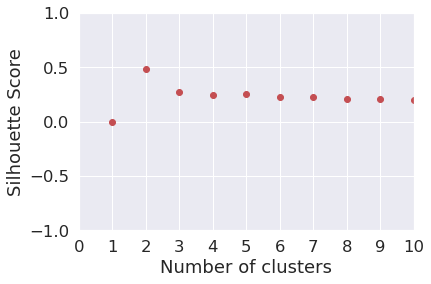

In [41]:
fignum = 11
plt.plot(report_df.index,report_df['Silhouette Score'],'ro')

plt.gca().set_xlim([0,10])
plt.gca().set_xticks(range(11))
plt.gca().set_ylim([-1,1])
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

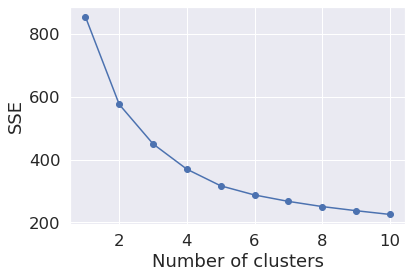

In [42]:
# calculate SSE for a range of number of cluster
list_SSE = []
min_k = 1
max_k = 10
range_k = range(min_k, max_k+1)
for i in range_k:
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(normed)
    # inertia is a concept from physics. Roughly it means SSE of clustering.
    list_SSE.append(km.inertia_)

# plot
plt.plot(range_k, list_SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [43]:
def mapping_clusters(labels_cluster):
    ppd['cluster_nm'] = labels_cluster
    ppd.plot(column='cluster_nm', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

[[-0.01512244  0.07759455  0.08189306  0.00663756]
 [ 0.67498166 -0.10664962 -0.28553262  1.38929272]]


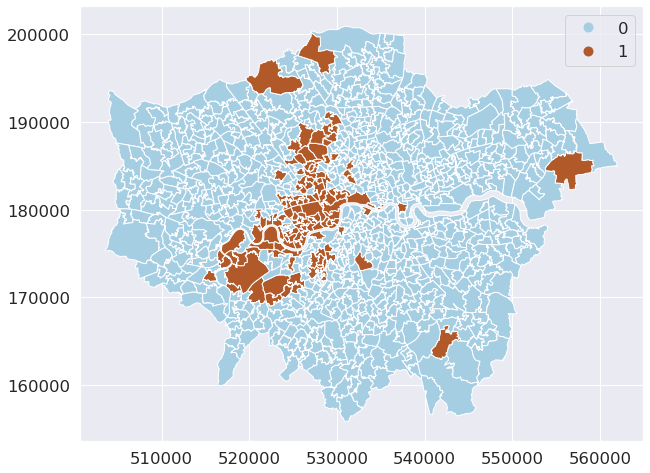

In [44]:
k_cluster = 2
random_seed = 12
kmeans_method = KMeans(n_clusters=k_cluster,random_state=random_seed)
kmeans_method.fit(normed)
clustering_center= kmeans_method.cluster_centers_
print(clustering_center)

# plotting
mapping_clusters(kmeans_method.labels_);